# Linear Regression
## Setup

In [133]:
# import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import time

# load datasets
fifa = np.load('./datasets/fifa.npz')
finance = np.load('./datasets/finance.npz')
orbits = np.load('./datasets/orbits.npz')

## Refactored Functions
Codes for common procedures are refactored into function below for simplicity.

In [134]:
def run_linear_regression(dataset):
    # load data
    X_train = dataset['train_X']
    Y_train = dataset['regression_train_Y']
    X_test = dataset['test_X']
    Y_test = dataset['regression_test_Y']
    
    # timer start
    start_time = time.time()
    
    # define and train model
    model = LinearRegression()
    model.fit(X_train, Y_train)
    print('Estimated intercept:', model.intercept_)
    print('Estimated coefficients:', model.coef_)
    print('\n')
    
    # predictions
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    
    # timer end
    print('Time elapsed for training and predictions: %.3f seconds' % (time.time() - start_time))
    print('\n')
    
    # R^2 scores
    print('Training set R^2 score: %.3f' % r2_score(Y_train, Y_train_pred))
    print('Testing set R^2 score: %.3f' % r2_score(Y_test, Y_test_pred))
    
    # evaluate testing output
    plt.scatter(Y_test, Y_test_pred)
    plt.plot([0,1], [0,1], c='black') # add diagnoial
    plt.title('Testing set: True Value vs Predicted Value')
    plt.xlabel('True Value')
    plt.ylabel('Predicted Value')
    plt.show()
    
    sqr_error = (Y_test_pred - Y_test) ** 2
    mse = np.sum(sqr_error)/len(sqr_error)
    # sanity check for calculation
    assert(mse == mean_squared_error(Y_test, Y_test_pred))
    
    plt.hist(sqr_error)
    plt.title('Testing set: Squared Error')
    plt.xlabel('Squared Error')
    plt.ylabel('Frequency')
    plt.show()
    
    print('Test set Mean Squared Error: %.3f' % mse)

## FIFA Dataset

Estimated intercept: -0.4837658832378526
Estimated coefficients: [ 0.03399686  0.04065948  0.33711262  0.03674203  0.01062253 -0.03126748
  0.08024437  0.00718437  0.38491537 -0.09337459  0.01337158 -0.00555847
  0.0932485   0.0240375   0.13463164 -0.03372189  0.05278269  0.07175846
  0.01169029  0.05833306 -0.03632139  0.01477842  0.0214001   0.17791538
  0.04308956  0.05216685 -0.04791237  0.01951092  0.01191993  0.00530322
 -0.01100853  0.16475427  0.10985266  0.06221     0.15169826  0.14792519]


Time elapsed for training and predictions: 0.016 seconds


Training set R^2 score: 0.838
Testing set R^2 score: 0.842


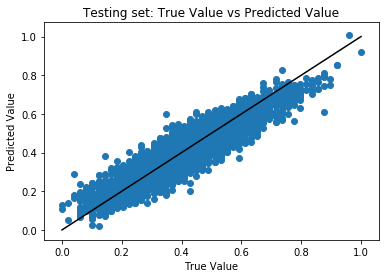

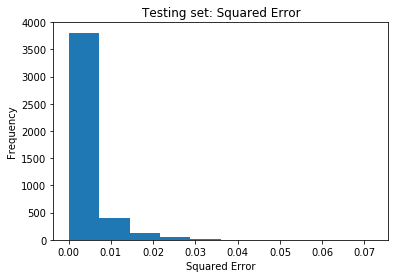

Test set Mean Squared Error: 0.003


In [135]:
run_linear_regression(fifa)

## Finance Dataset

Estimated intercept: 0.4148475687695684
Estimated coefficients: [ 5.75891954e-07 -8.30751353e-03 -1.44806424e-06 -3.14430984e-07
  6.27226369e-01 -8.30700308e-03  6.53285883e-07 -5.90441640e-01
  1.41027165e-06 -9.52657736e-07 -4.16345864e-07 -1.50792798e-06
  8.85336886e-07 -3.87782916e-07 -5.25868567e-08  2.34670621e-07
  1.11496115e-07 -3.93217778e-06  6.86028847e-07 -6.75262127e-07
  7.03916463e-07 -4.97937062e-07  3.87218032e-06  6.56319538e-07
  3.55064139e-07  4.39154209e-07]


Time elapsed for training and predictions: 0.004 seconds


Training set R^2 score: 1.000
Testing set R^2 score: 1.000


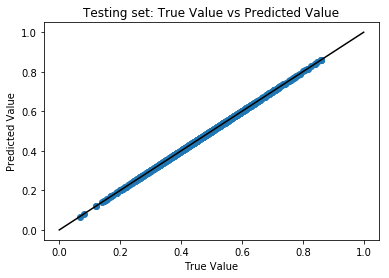

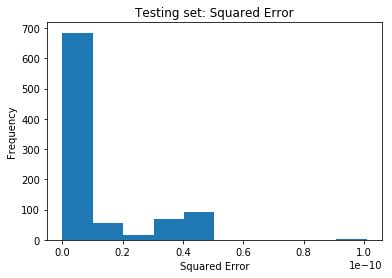

Test set Mean Squared Error: 0.000


In [136]:
run_linear_regression(finance)

## Orbits Dataset

Estimated intercept: 0.7582093863314968
Estimated coefficients: [-8.79094937e-02 -2.48655772e+00 -8.74861846e-02 -3.85604000e-01
 -1.56091344e-03 -4.29995989e-03 -1.44005107e-02  9.44539655e-02
  1.43936741e+00  1.33282422e+00 -3.65226688e-01 -1.05541177e+00]


Time elapsed for training and predictions: 0.003 seconds


Training set R^2 score: 0.686
Testing set R^2 score: 0.695


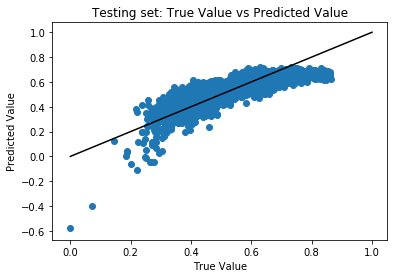

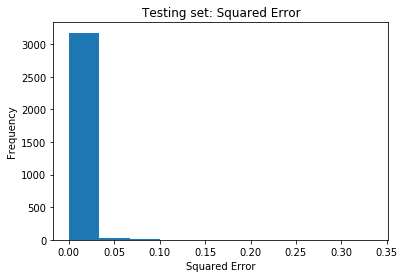

Test set Mean Squared Error: 0.005


In [137]:
run_linear_regression(orbits)